# **Asteroids Hazard Classification**

Dataset Source: [https://cneos.jpl.nasa.gov/](https://cneos.jpl.nasa.gov/)

Dataset Description:

| Column Name                         | Description                                                                  |
| ----------------------------------- | ---------------------------------------------------------------------------- |
| `name`                              | Name of the asteroid                                                         |
| `neo_reference_id`                  | Unique ID assigned by NASA's NEO program                                     |
| `absolute_magnitude_h`              | Absolute magnitude (brightness) of the asteroid                              |
| `estimated_diameter_min_km`         | Minimum estimated diameter in kilometers                                     |
| `estimated_diameter_max_km`         | Maximum estimated diameter in kilometers                                     |
| `estimated_diameter_min_m`          | Minimum estimated diameter in meters                                         |
| `estimated_diameter_max_m`          | Maximum estimated diameter in meters                                         |
| `estimated_diameter_min_miles`      | Minimum estimated diameter in miles                                          |
| `estimated_diameter_max_miles`      | Maximum estimated diameter in miles                                          |
| `estimated_diameter_min_feet`       | Minimum estimated diameter in feet                                           |
| `estimated_diameter_max_feet`       | Maximum estimated diameter in feet                                           |
| `close_approach_date`               | Date of close approach to Earth                                              |
| `epoch_date_close_approach`         | Close approach epoch time (in milliseconds)                                  |
| `relative_velocity_km_per_sec`      | Relative velocity of the asteroid in km/sec                                  |
| `relative_velocity_km_per_hr`       | Relative velocity in km/hr                                                   |
| `relative_velocity_miles_per_hr`    | Relative velocity in miles/hr                                                |
| `miss_distance_astronomical`        | Distance from Earth in astronomical units (AU)                               |
| `miss_distance_lunar`               | Distance in lunar units (Moon-Earth distance)                                |
| `miss_distance_kilometers`          | Distance in kilometers                                                       |
| `miss_distance_miles`               | Distance in miles                                                            |
| `orbiting_body`                     | Celestial body the asteroid is orbiting (usually Earth)                      |
| `orbit_id`                          | Unique identifier for the orbital path                                       |
| `orbit_determination_date`          | Date when orbit was last determined                                          |
| `first_observation_date`            | First date the asteroid was observed                                         |
| `last_observation_date`             | Most recent observation date                                                 |
| `eccentricity`                      | Orbital eccentricity (shape of the orbit)                                    |
| `semi_major_axis`                   | Semi-major axis of the orbit in AU                                           |
| `inclination`                       | Orbital inclination in degrees                                               |
| `ascending_node_longitude`          | Longitude of ascending node                                                  |
| `orbital_period`                    | Time taken to complete one orbit (in days)                                   |
| `perihelion_distance`               | Closest distance of the asteroid to the sun                                  |
| `perihelion_argument`               | Argument of perihelion (orbital parameter)                                   |
| `aphelion_distance`                 | Furthest distance from the sun                                               |
| `perihelion_time`                   | Time when perihelion occurs                                                  |
| `mean_anomaly`                      | Mean anomaly (orbital parameter)                                             |
| `mean_motion`                       | Mean motion (degrees per day)                                                |
| `equinox`                           | Equinox used for coordinate system reference                                 |
| `Hazardous`                         | Boolean indicating if the asteroid is potentially hazardous (`True`/`False`) |

* potentially hazardous asteroids: Several asteroids are currently monitored as potentially hazardous due to their size and trajectory, with some posing a risk of impacting Earth in the future. While many potential impactors are identified, the chances of a collision are often low and can decrease with further observation.

* Non-potentially hazardous asteroids: Non-hazardous asteroids are asteroids that do not pose a significant threat of impacting Earth. These are asteroids whose orbits do not come within a certain close proximity to Earth's orbit and are not large enough to cause significant damage upon impact.

### Import neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# # Data Collection

In [2]:
df = pd.read_csv(r"Dataset\nasa.csv")
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [ ]:
pd.set_option("display.max_columns", None)

# # EDA

In [ ]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
df.shape

(4687, 40)

In [ ]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [ ]:
df.drop([df.columns[0], df.columns[1]], axis=1, inplace=True)

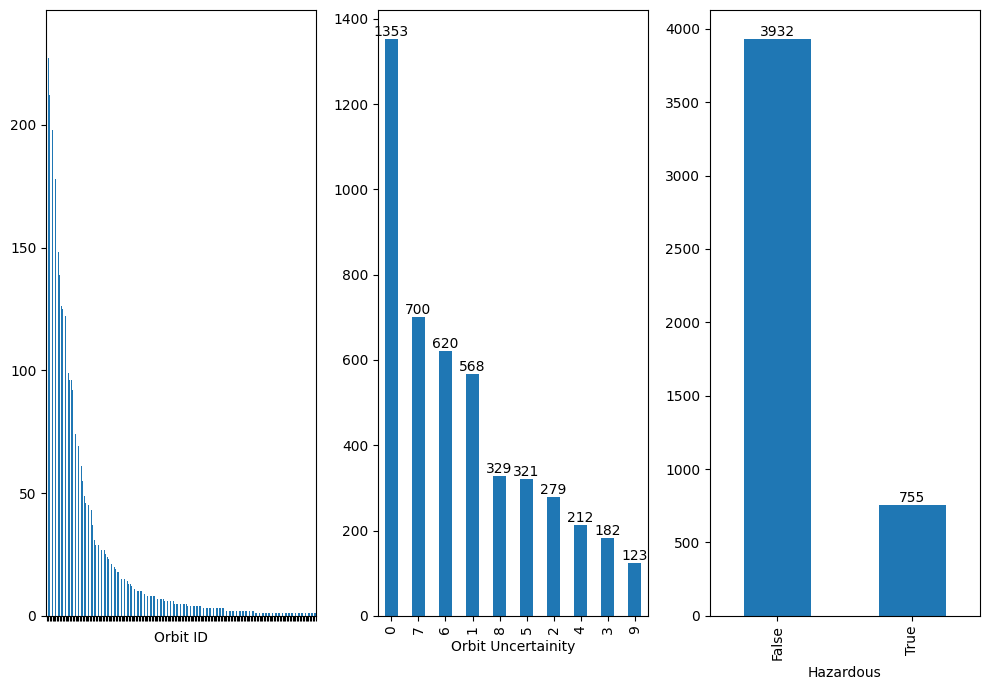

In [ ]:
# Categorical values
categories = ["Orbit ID", "Orbit Uncertainity", "Hazardous"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7))
for i, j in enumerate(categories):
    counts = df[j].value_counts()
    counts.plot(kind="bar", ax=axes[i])
    if len(counts) <= 10:
        for container in axes[i].containers:
            axes[i].bar_label(container)
    else:
        axes[i].set_xticklabels(())
plt.tight_layout()
plt.show()

In [ ]:
numericals = []
for i in df.columns:
    if i not in categories+["Close Approach Date", "Orbiting Body", "Orbit Determination Date", "Equinox"]:
        numericals += [i]

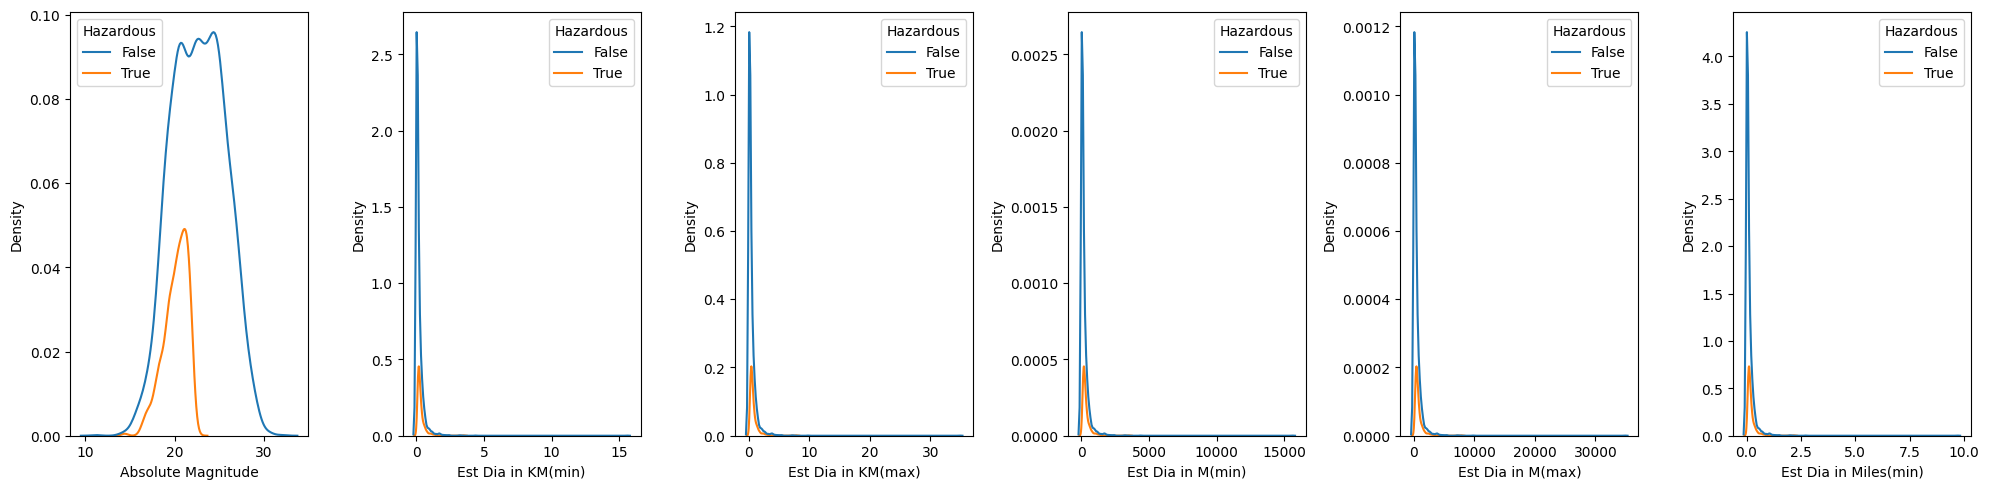

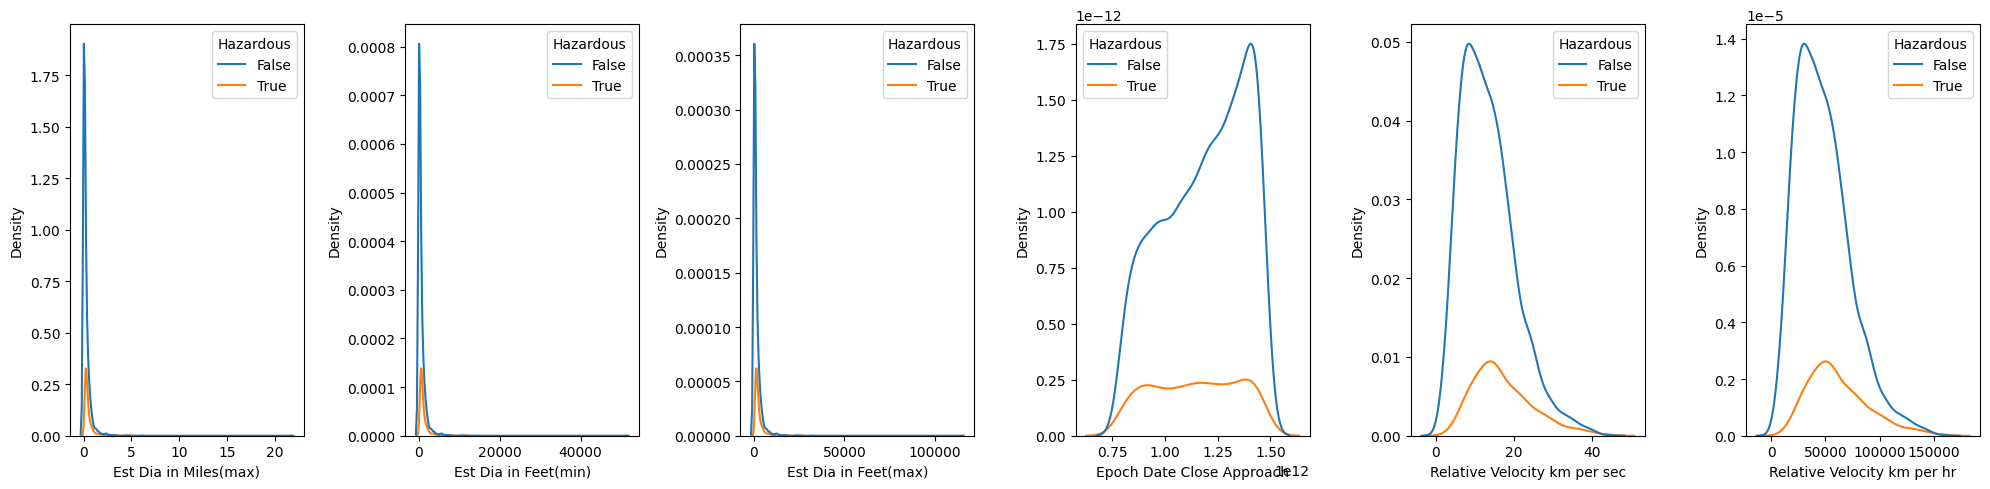

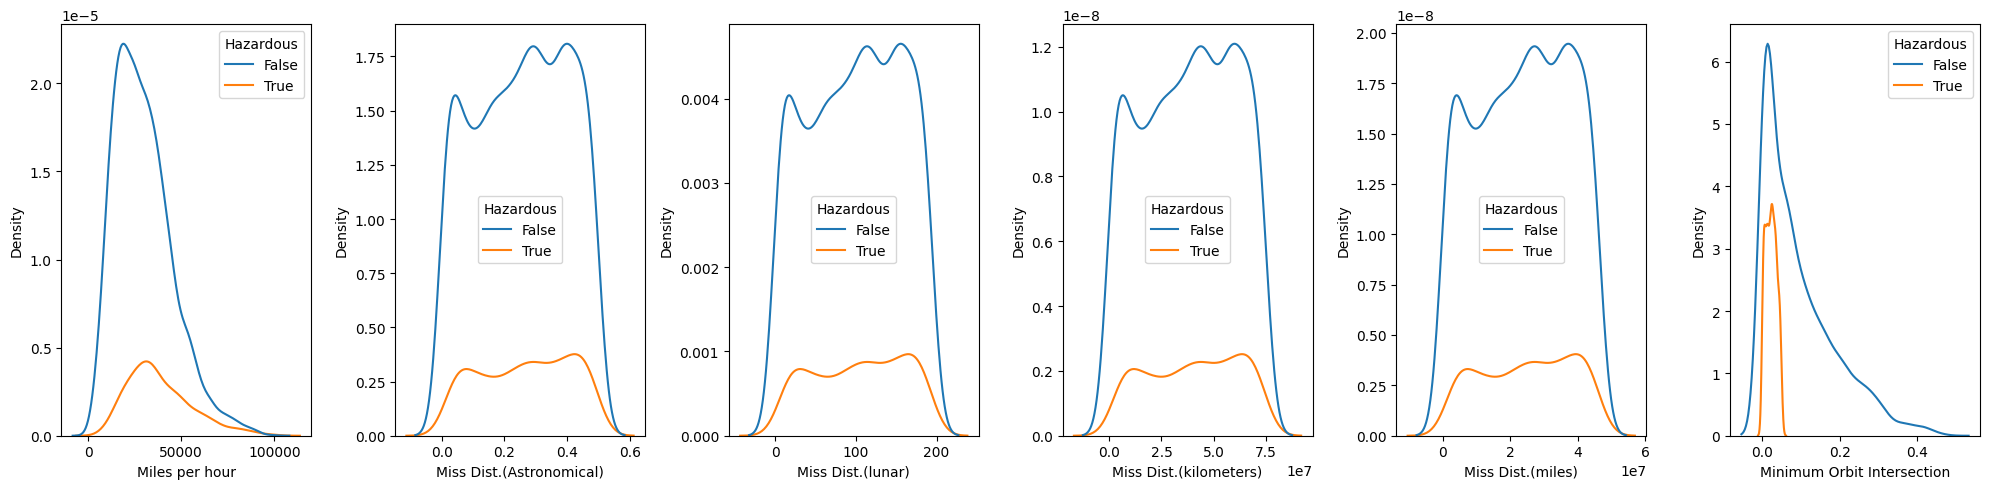

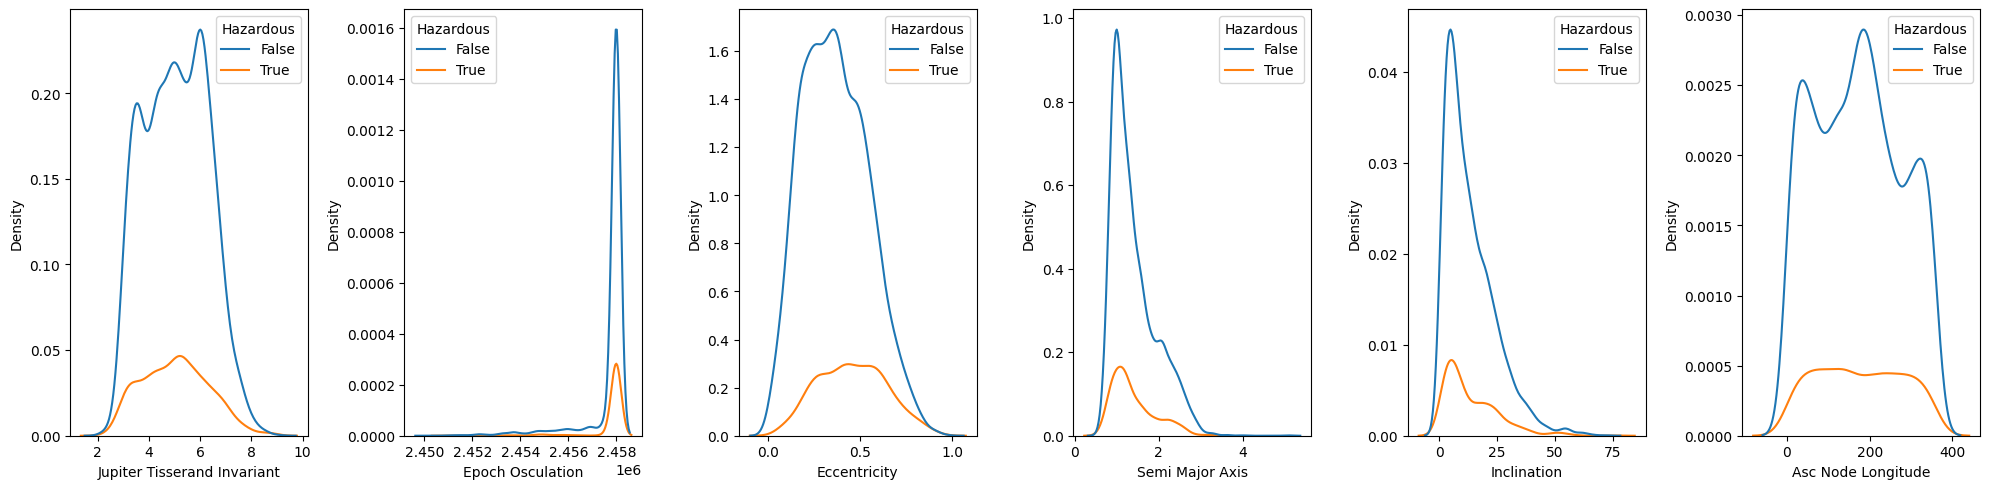

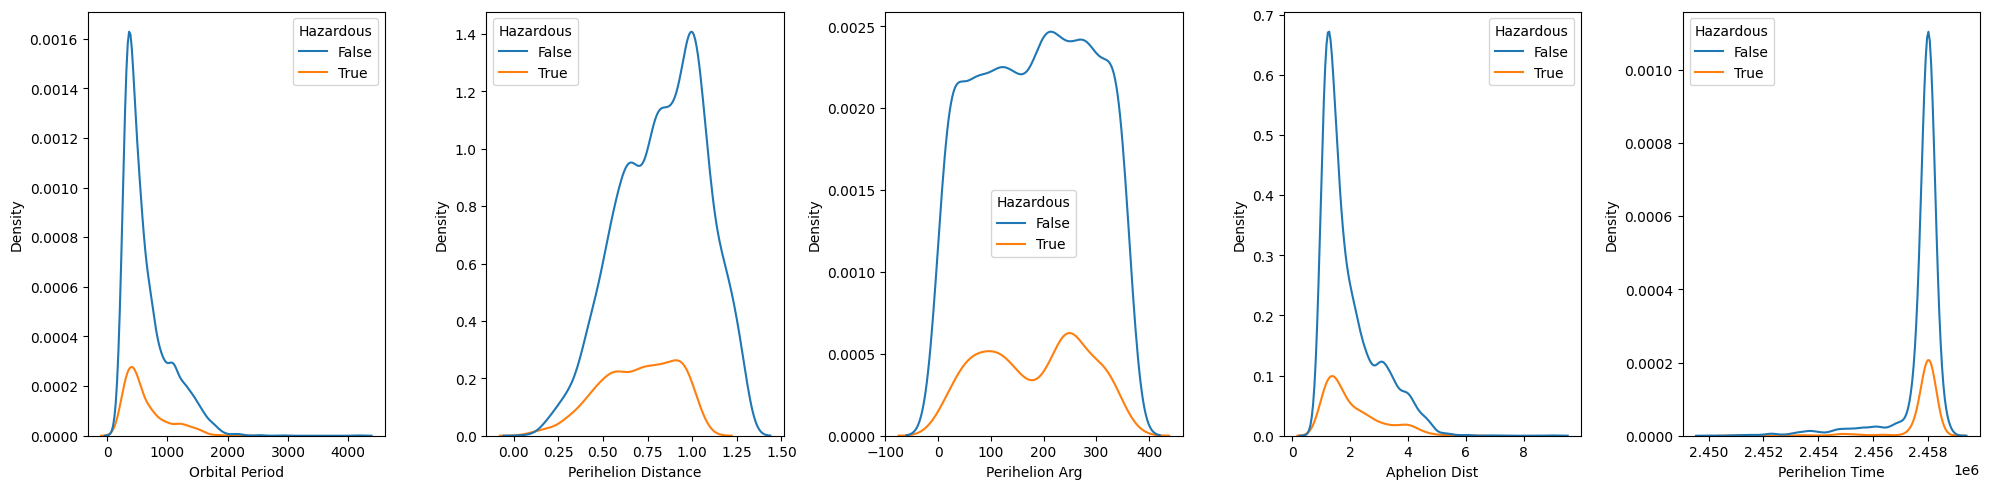

In [ ]:
# Numerical densities for hazardous and non-hazardous asteroids
index = 0
for i in range(5):
    cols = 6
    if i == 4:
        cols -= 1
    fig, axes = plt.subplots(nrows=1, ncols=cols, figsize=(20, 5))
    for j in range(cols):
        sns.kdeplot(df, x=numericals[index], hue=categories[-1], ax=axes[j])
        index += 1
    plt.tight_layout()
    plt.show()

In [ ]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [ ]:
def convert_time(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.year, date.month, date.day]

In [ ]:
# Converting dates
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "October", "December"]

In [ ]:
df["Approach year"] = df["Close Approach Date"].apply(lambda x: convert_time(x)[0])
df["Approach month"] = df["Close Approach Date"].apply(lambda x: months[convert_time(x)[1]-1])
df["Approach day"] = df["Close Approach Date"].apply(lambda x: convert_time(x)[2])

In [ ]:
df["Estimation year"] = df["Orbit Determination Date"].apply(lambda x: convert_time(x.split()[0])[0])
df["Estimation month"] = df["Orbit Determination Date"].apply(lambda x: months[convert_time(x.split()[0])[1]-1])
df["Estimation day"] = df["Orbit Determination Date"].apply(lambda x: convert_time(x.split()[0])[2])

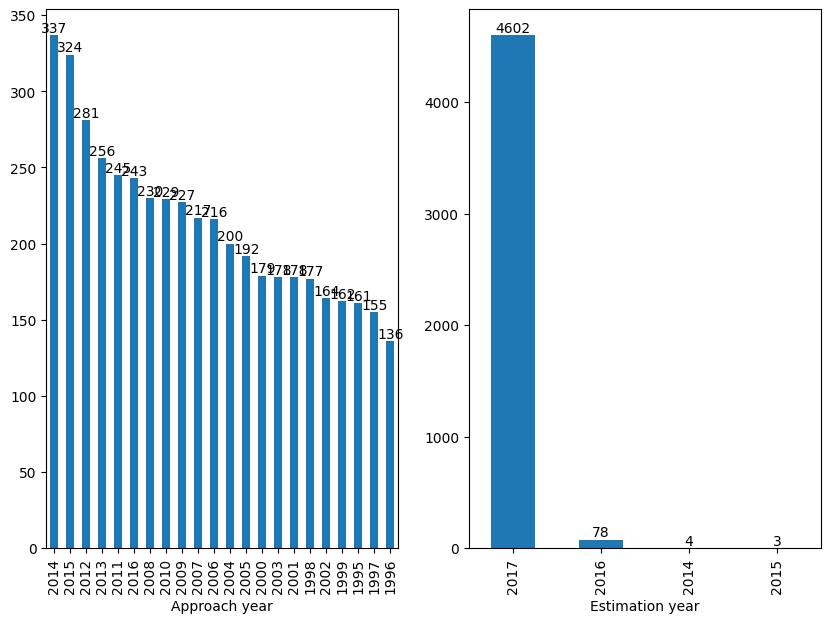

In [ ]:
# Count of years for estimated approach date and dates of orbit estimation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
for i, j in enumerate(["Approach year", "Estimation year"]):
    df[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
plt.show()

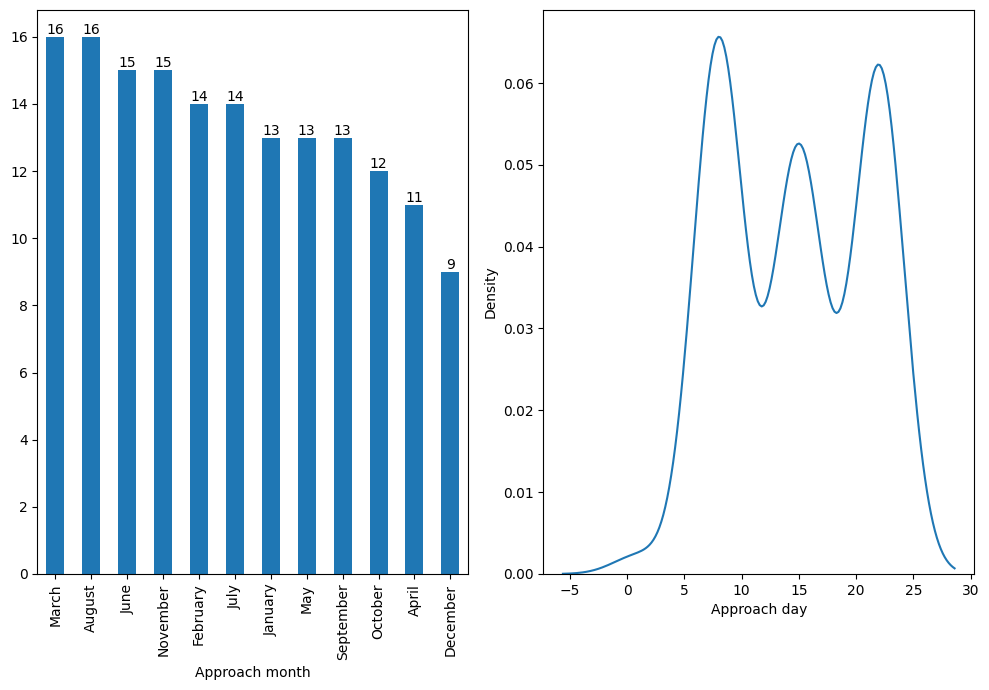

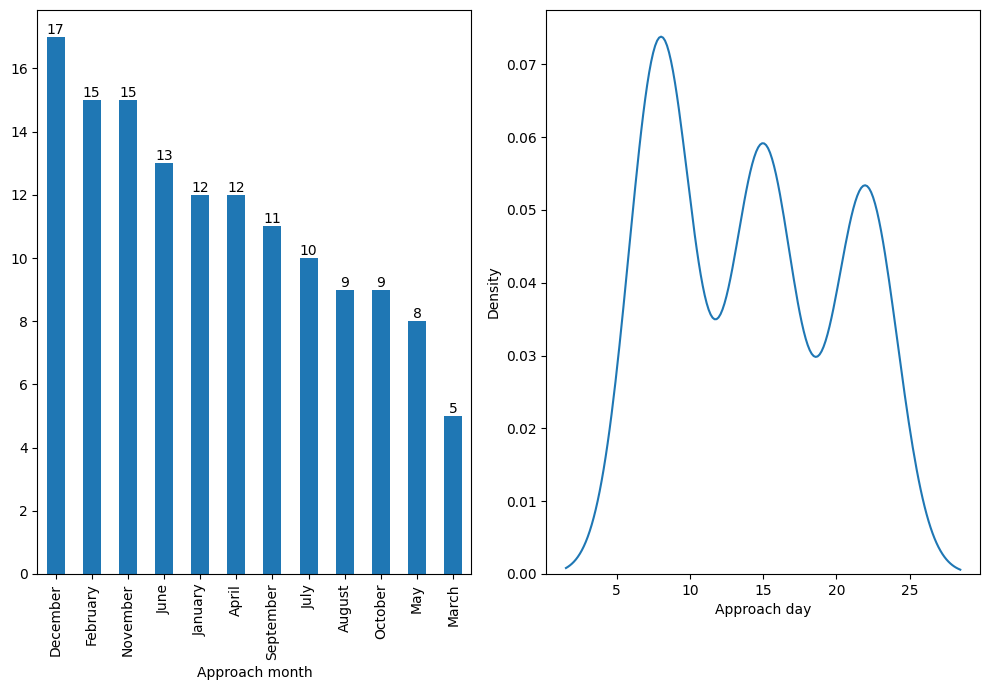

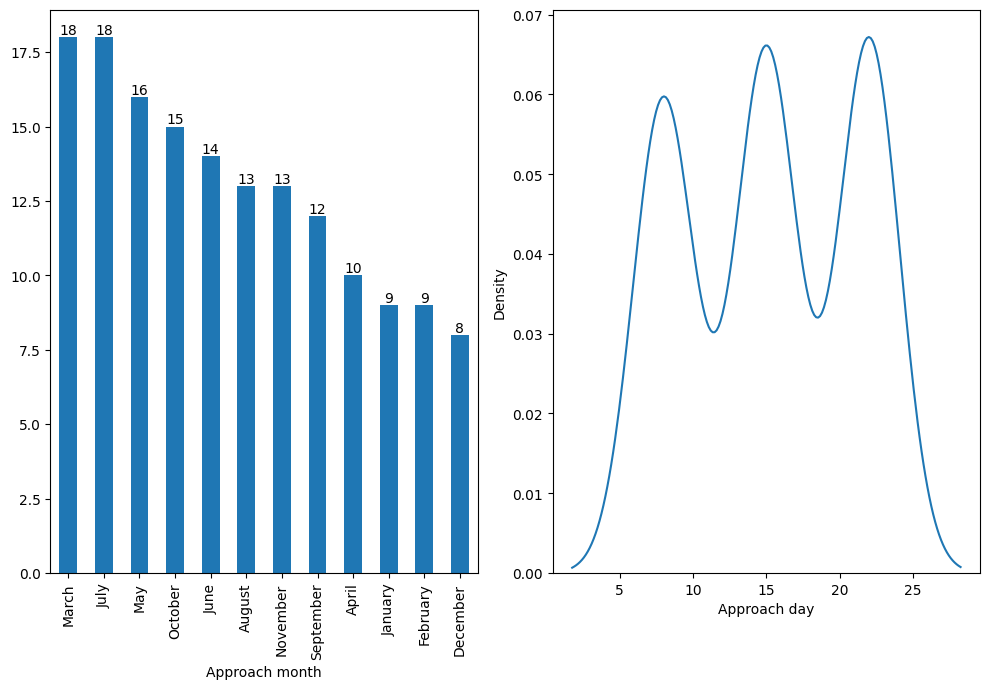

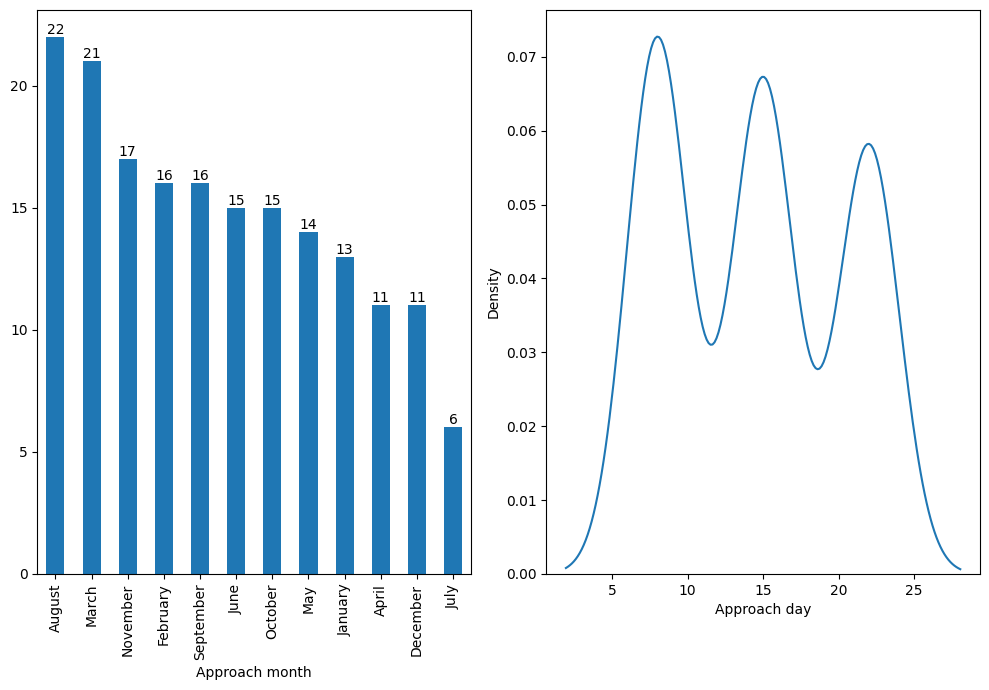

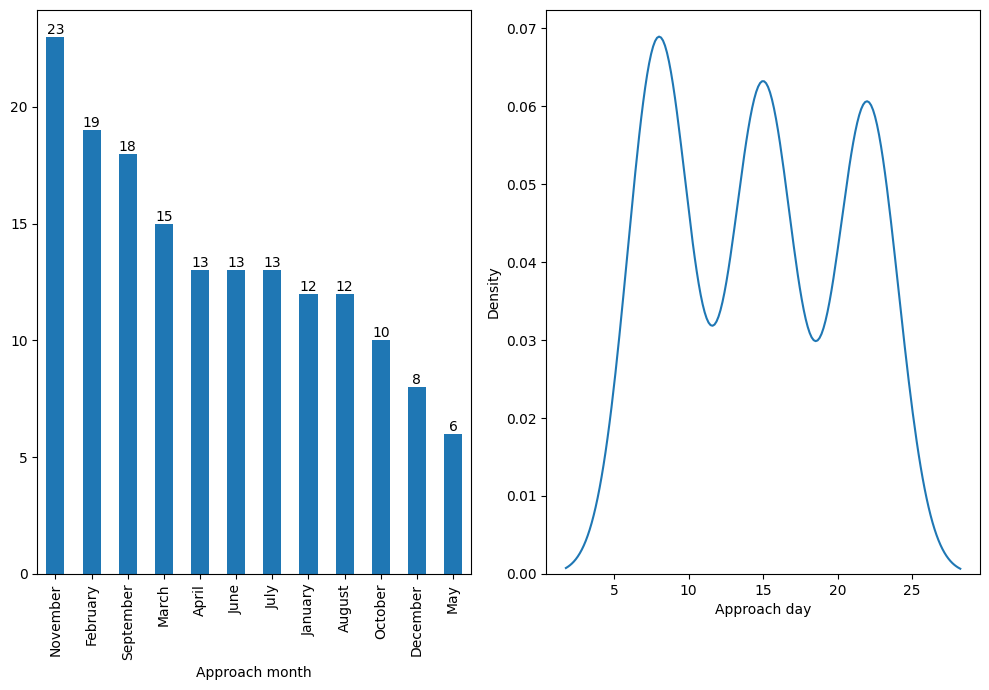

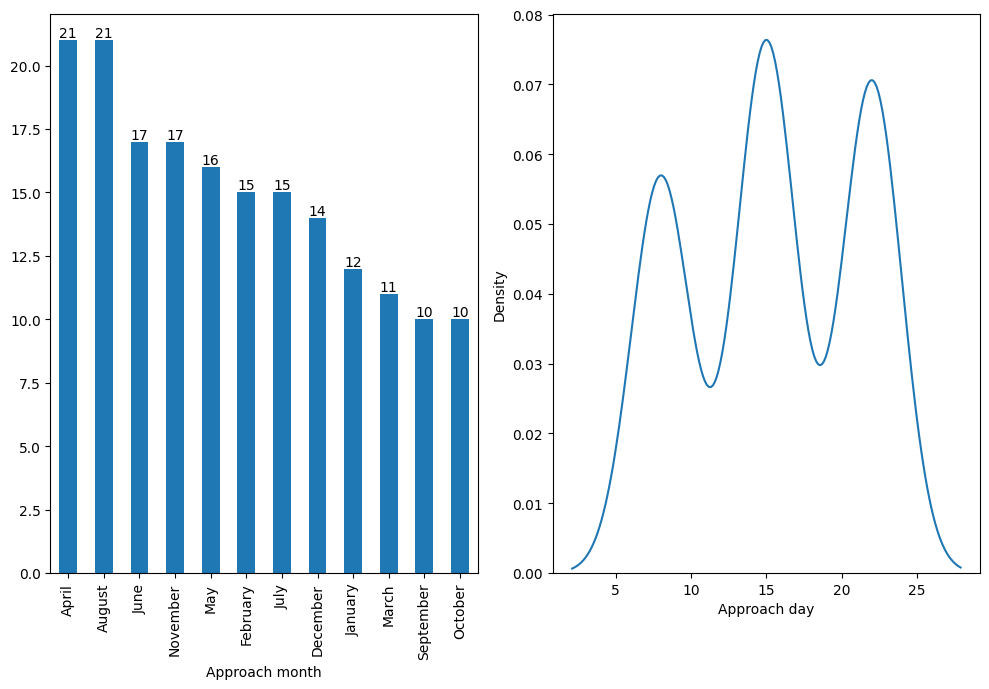

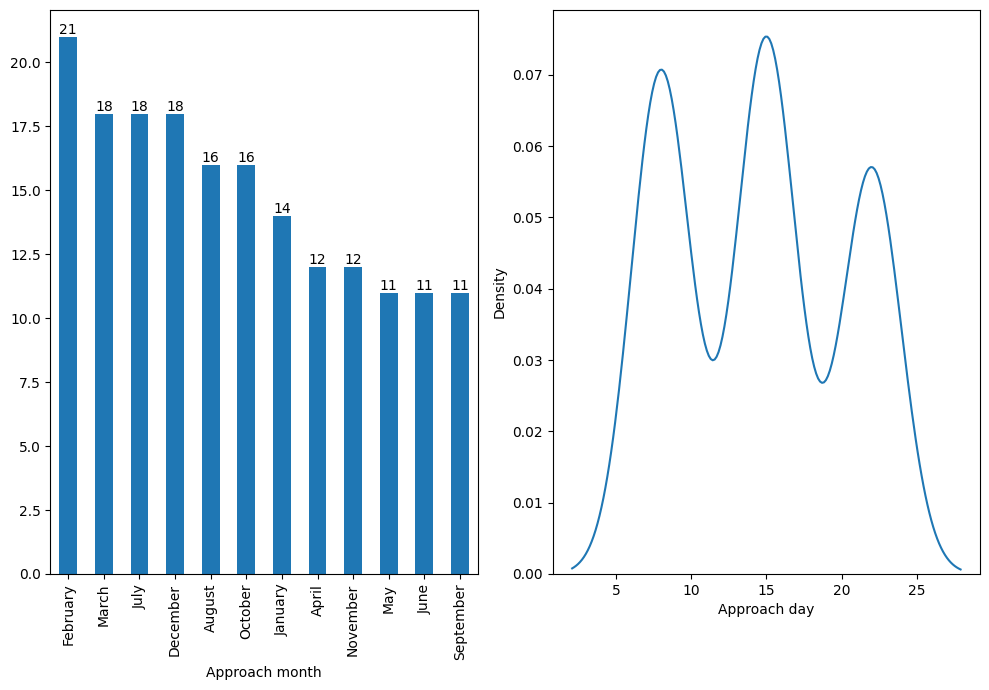

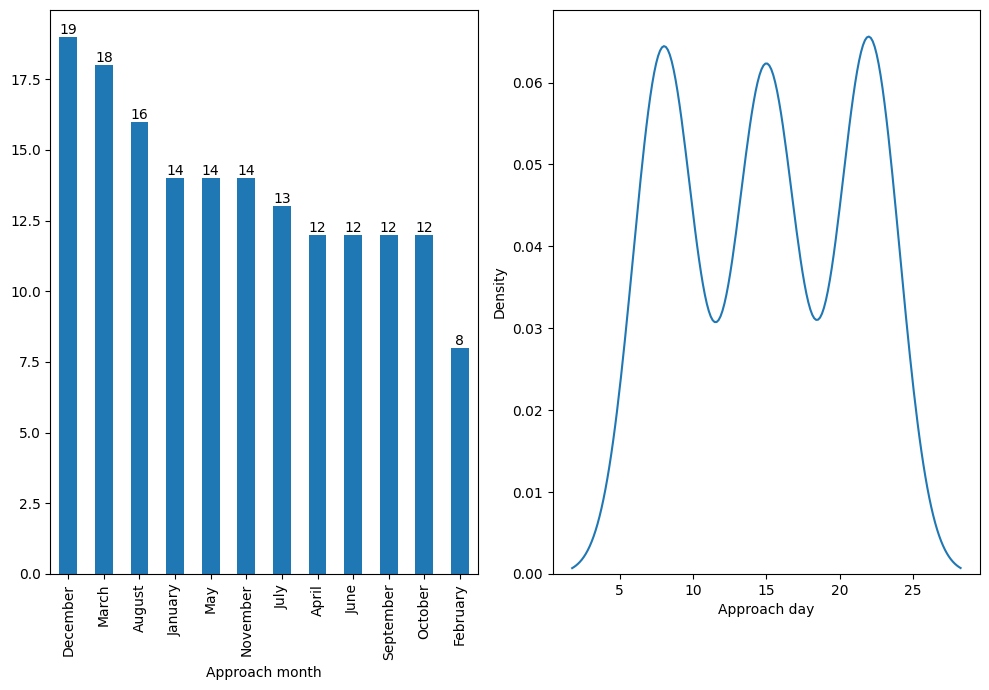

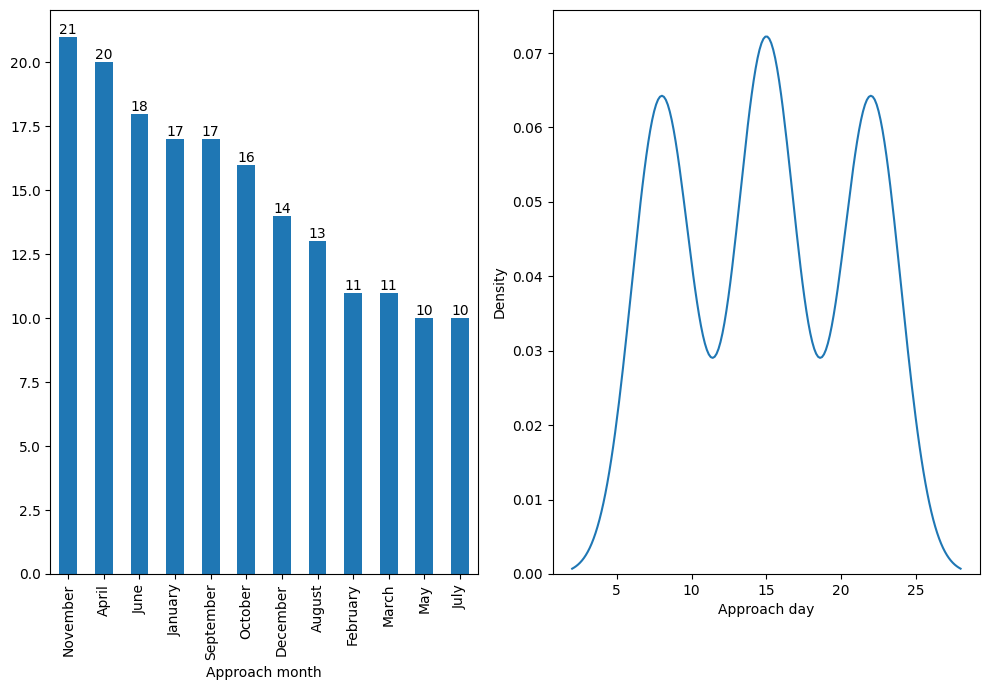

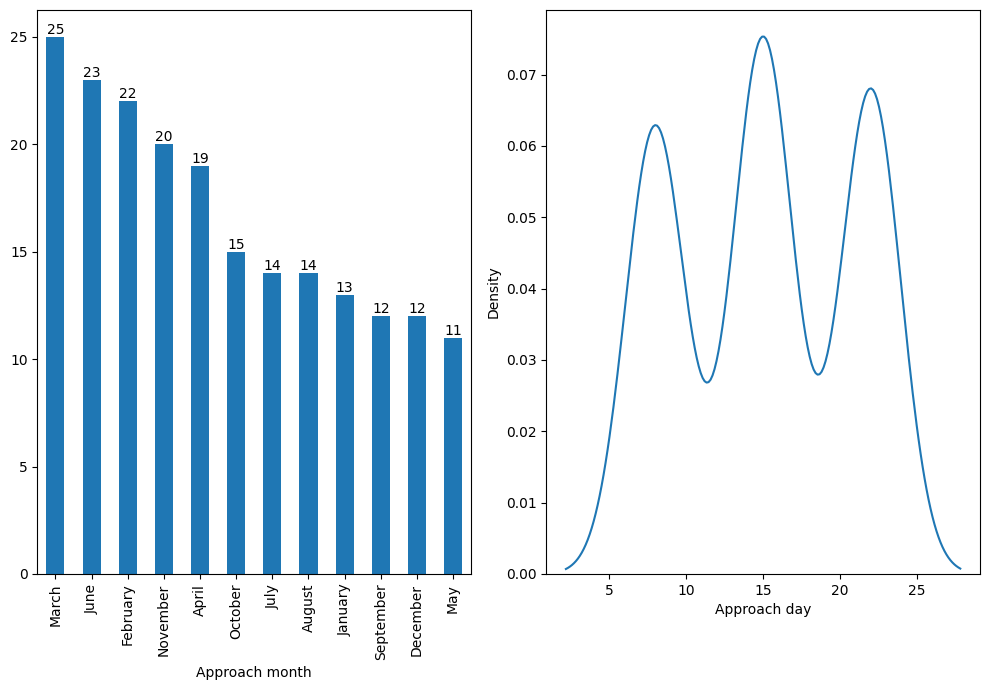

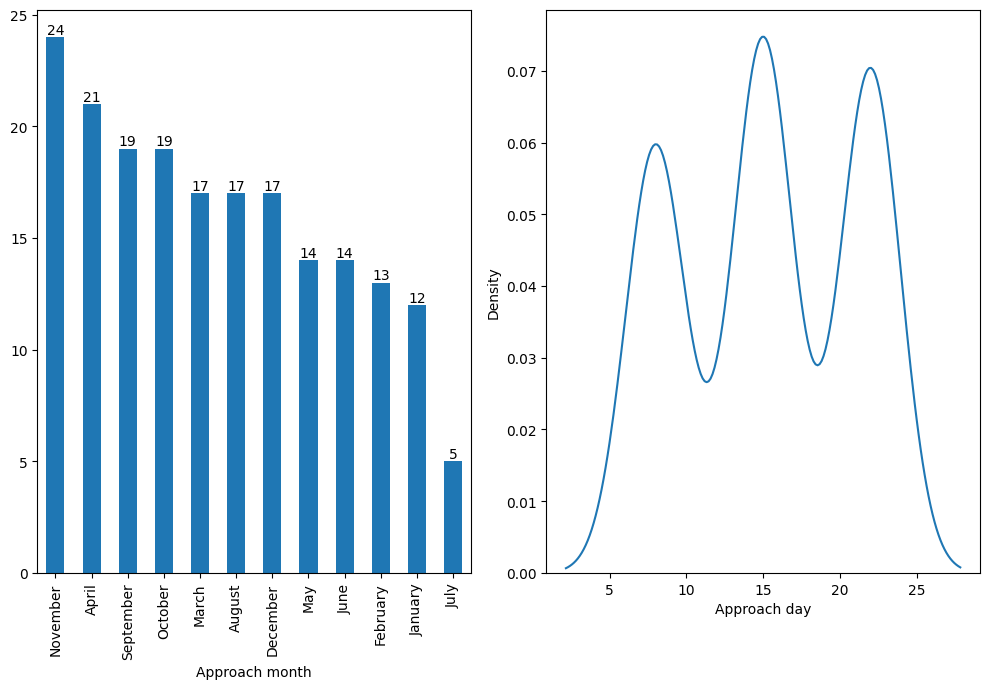

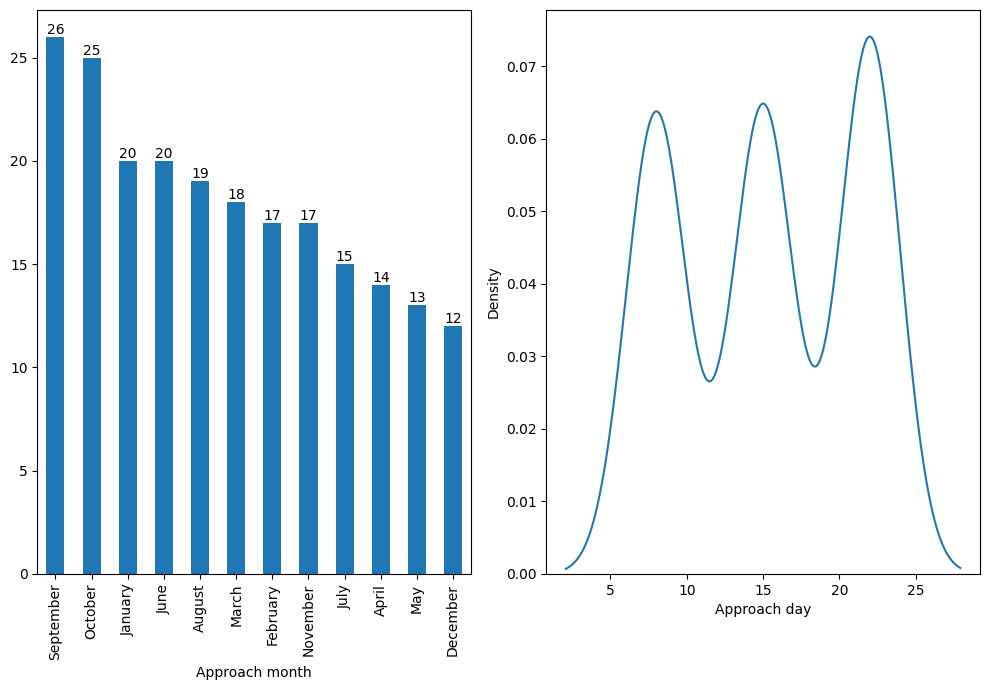

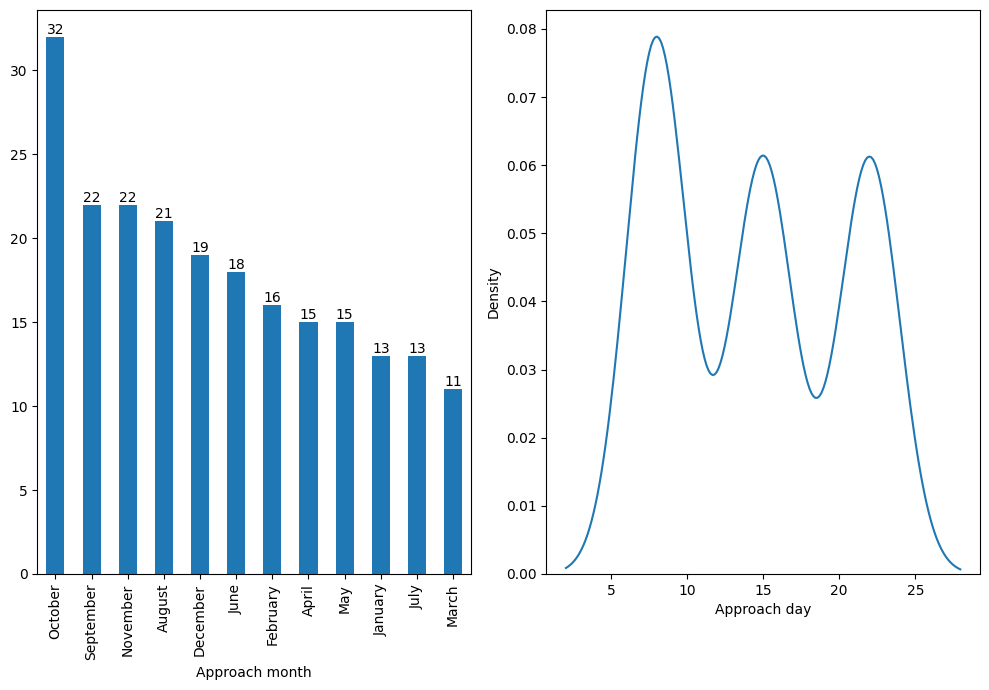

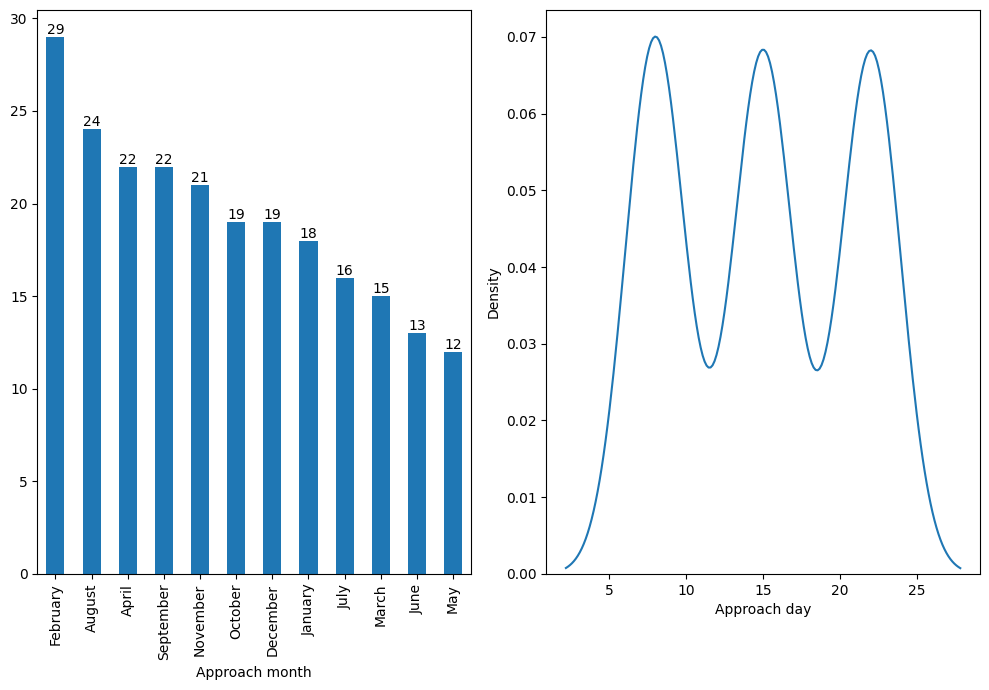

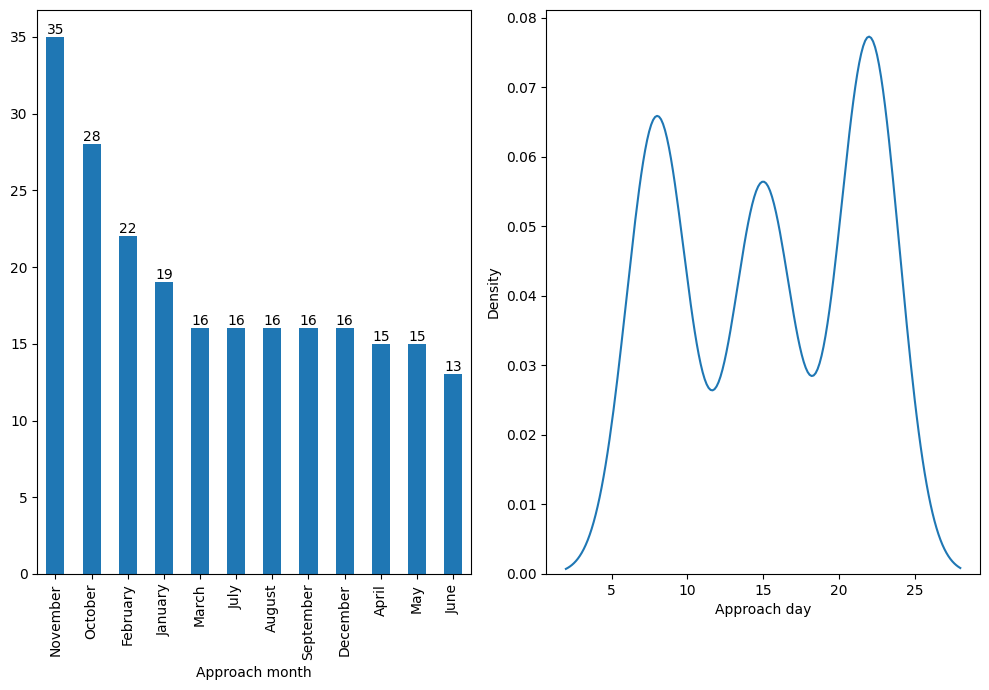

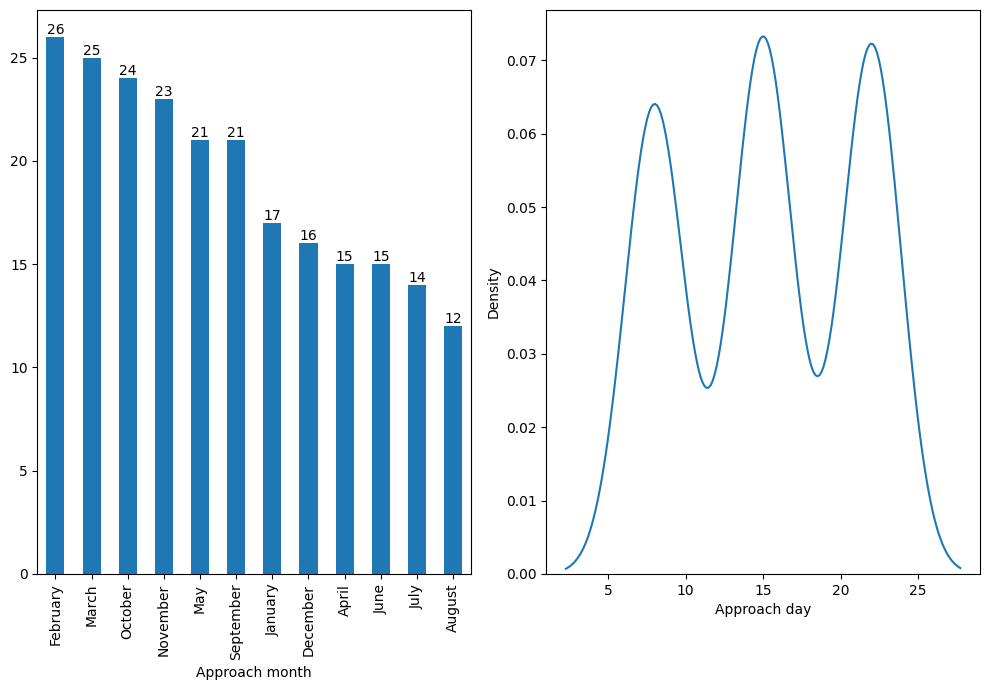

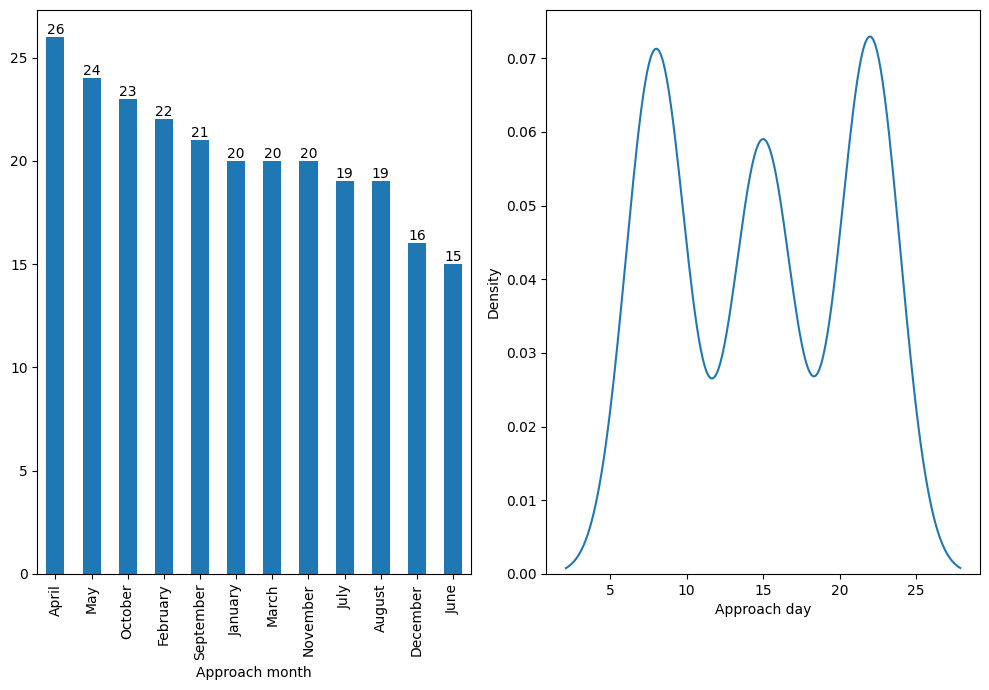

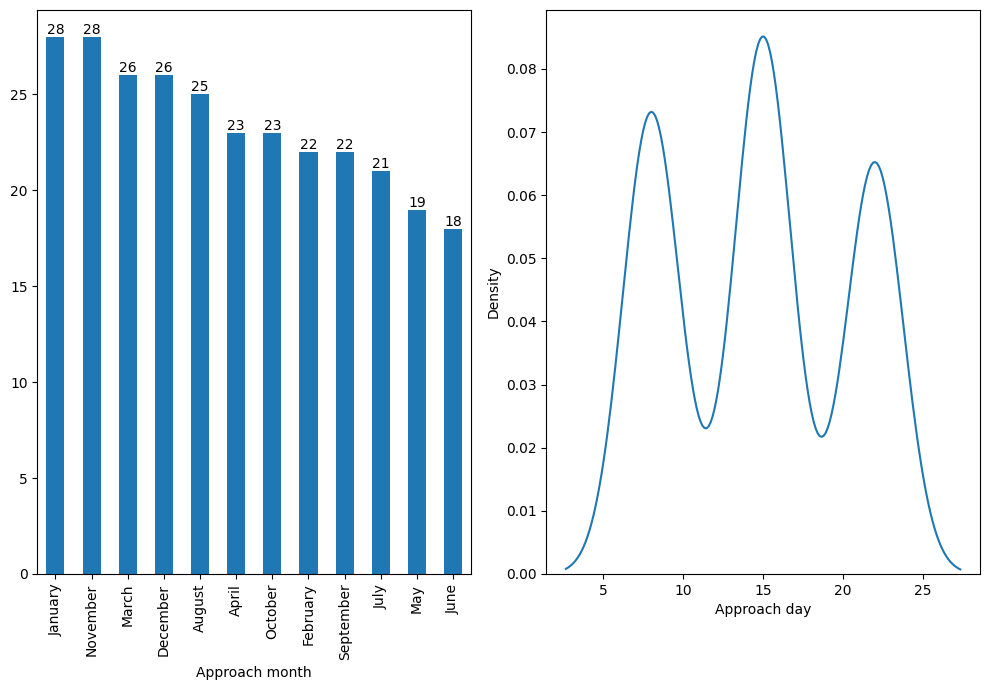

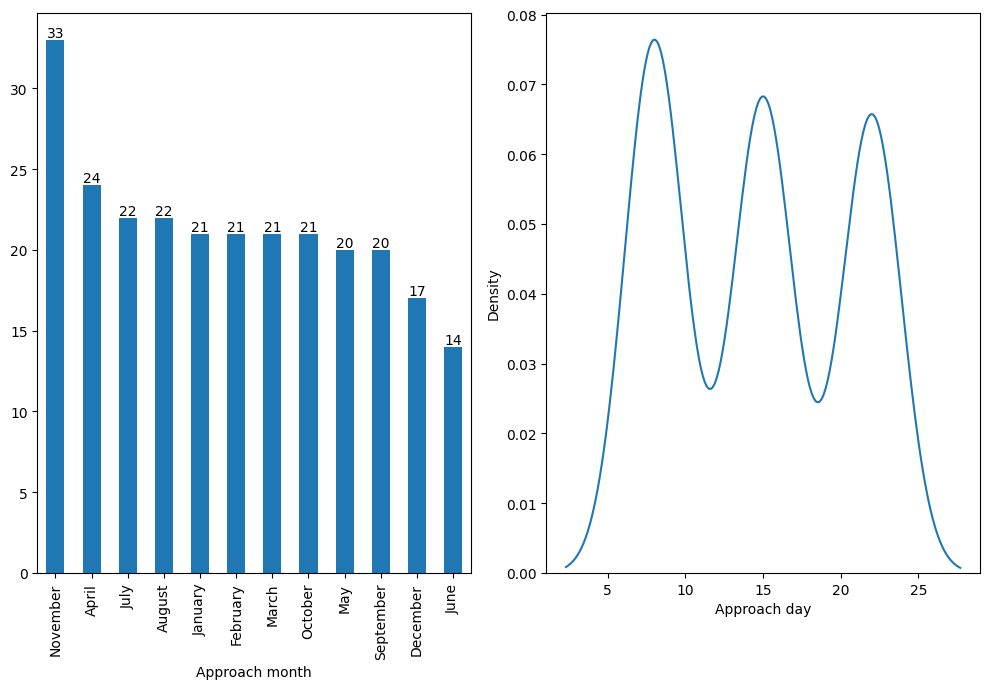

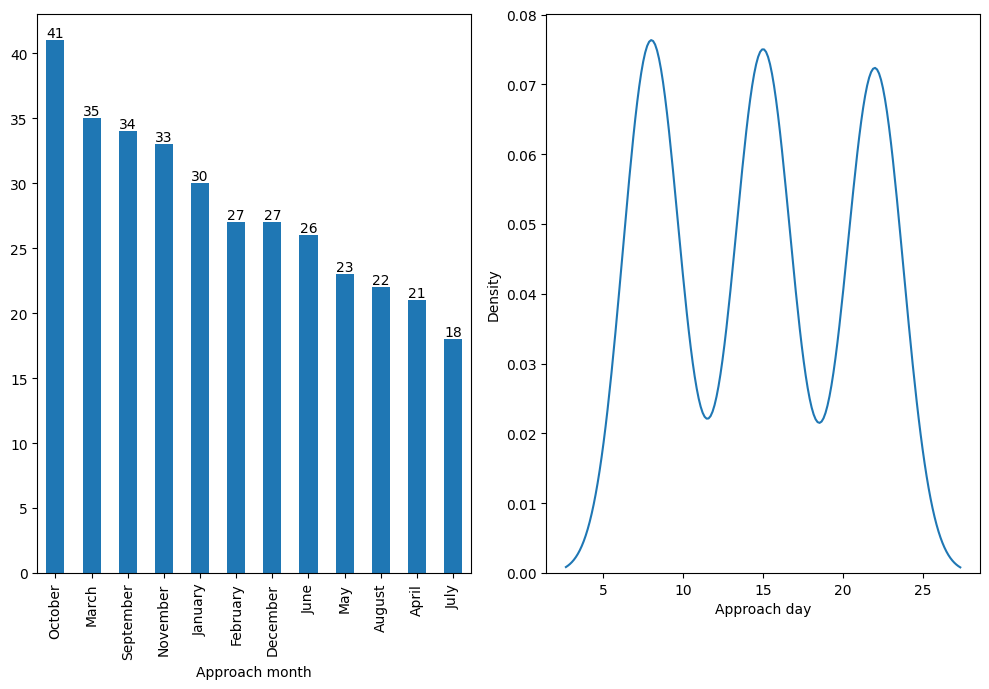

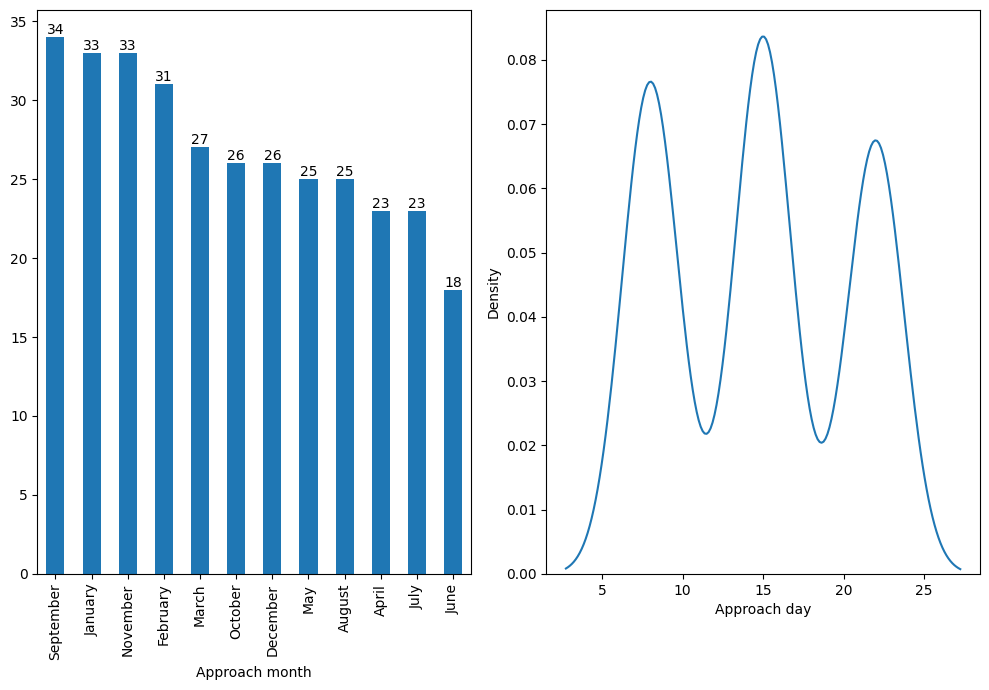

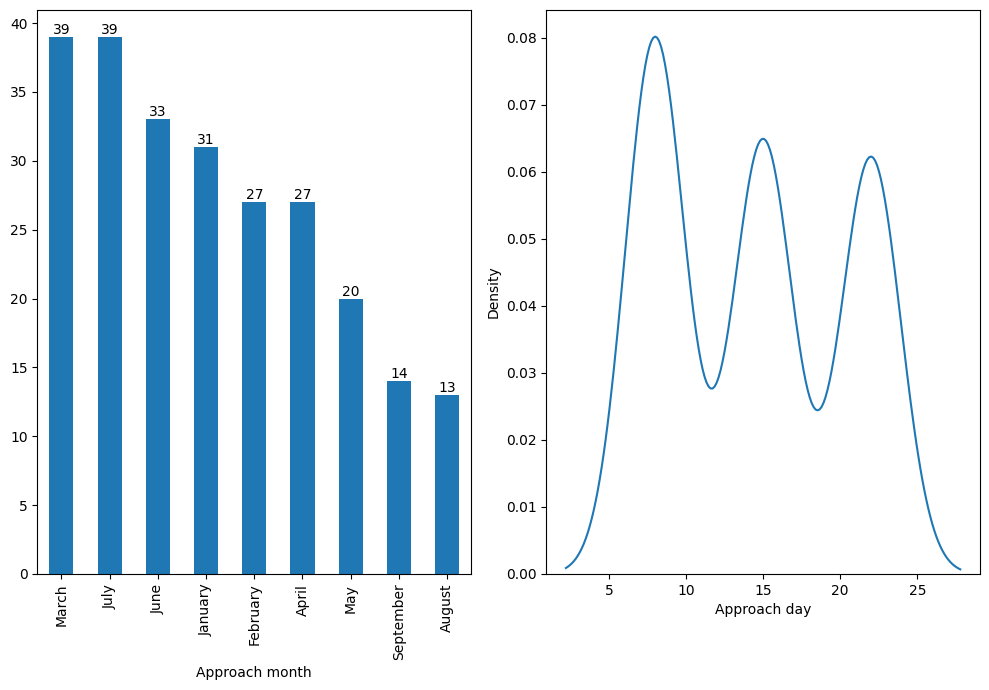

In [ ]:
for i in df["Approach year"].unique():
    display(HTML('<h1>Approach months tendencies and days density for {} year</h1>'.format(i)))
    group = df[df["Approach year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    group["Approach month"].value_counts().plot(kind="bar", ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    sns.kdeplot(group, x="Approach day", ax=axes[1])
    plt.tight_layout()
    plt.show()

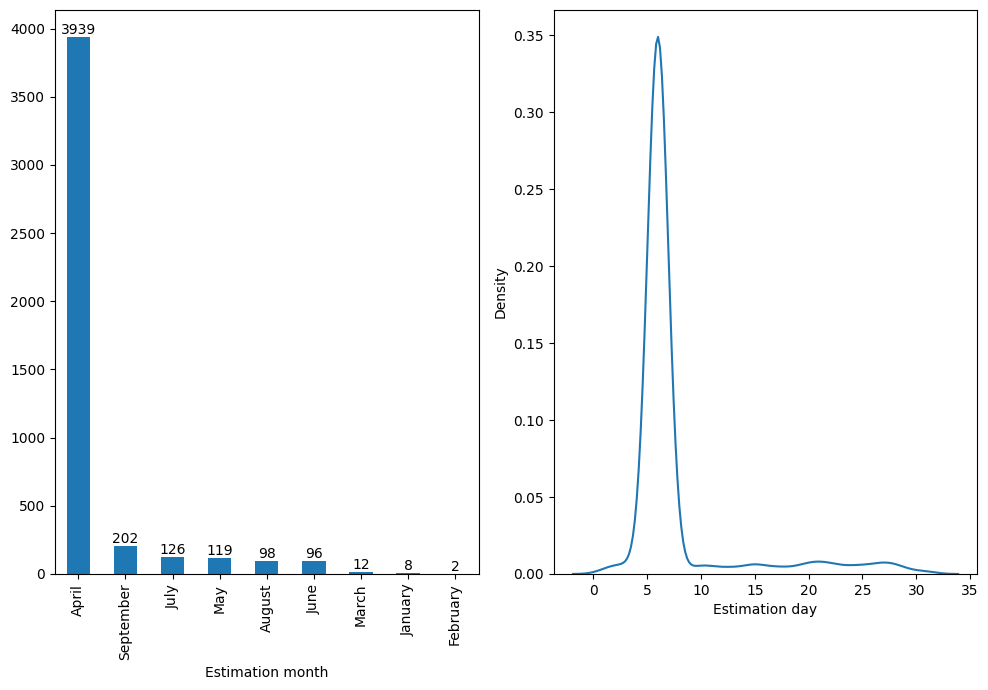

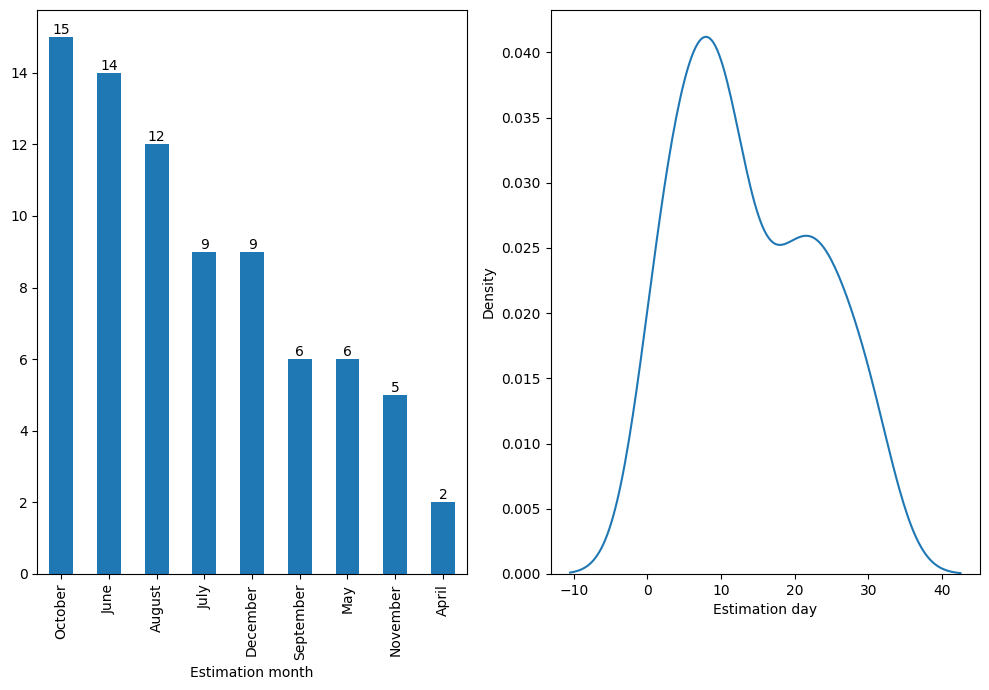

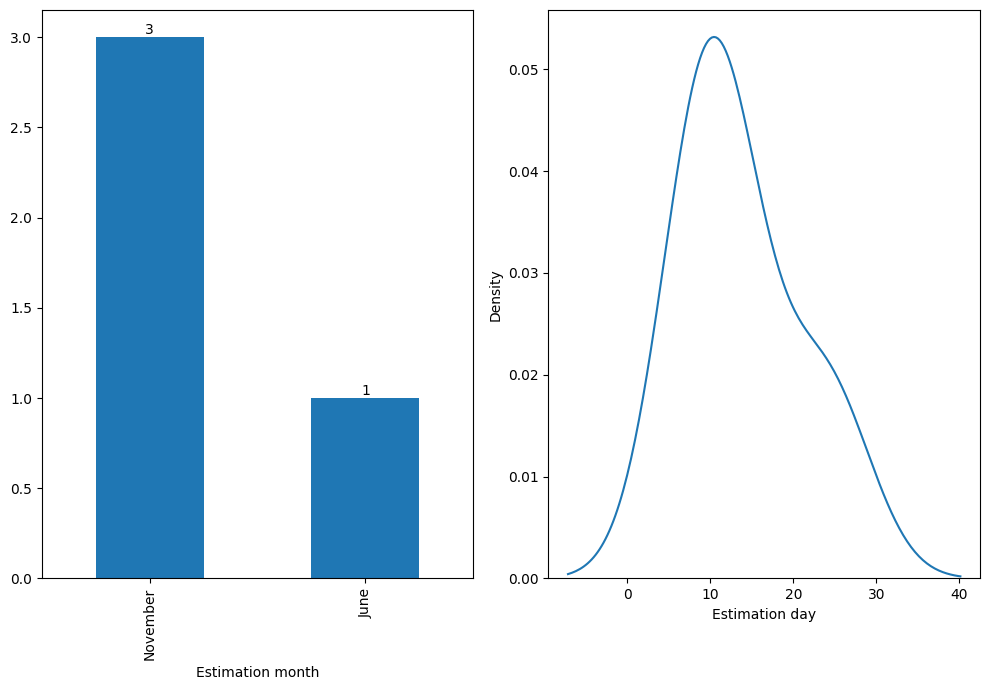

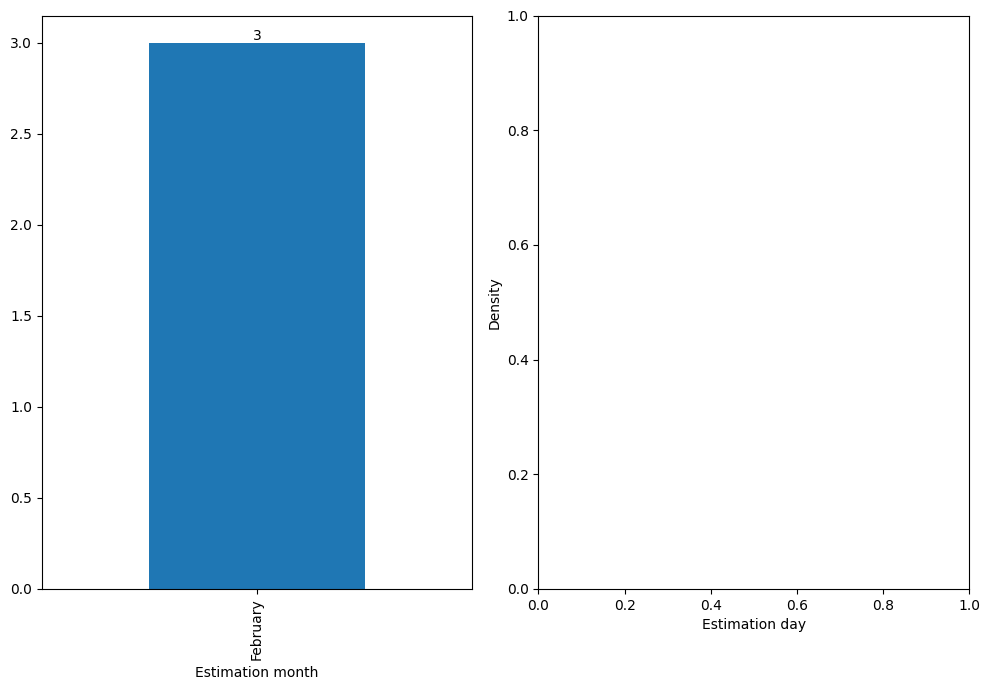

In [ ]:
for i in df["Estimation year"].unique():
    display(HTML('<h1>Estimated orbit months tendencies and days density for {} year</h1>'.format(i)))
    group = df[df["Estimation year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
    group["Estimation month"].value_counts().plot(kind="bar", ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    sns.kdeplot(group, x="Estimation day", ax=axes[1])
    plt.tight_layout()
    plt.show()

In [ ]:
# Encoding hazardous and non-hazardous asteroids

le = LabelEncoder()
df["Hazardous"] = le.fit_transform(df["Hazardous"])

In [ ]:
# Scaling selected features

data = df[numericals+categories].values
x = data[:, :-1]
y = data[:, -1]

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# # Data Spilitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
# Applying SMOTE to deal with bias and class imbalances

print("Before ", Counter(y_train))
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)
print("After: ", Counter(y_train.tolist()))

Before  Counter({0.0: 3141, 1.0: 608})
After:  Counter({0.0: 3141, 1.0: 3141})


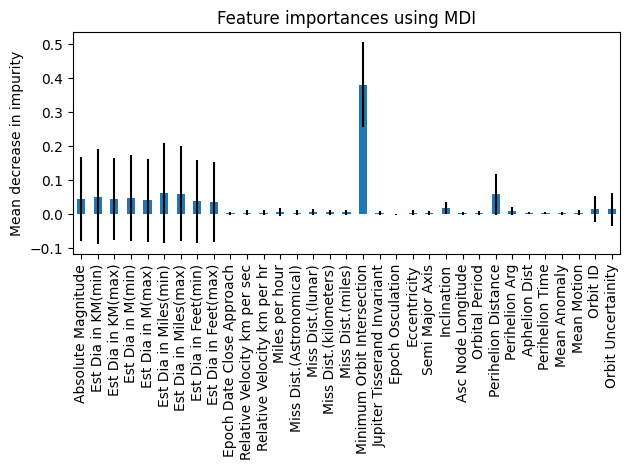

In [ ]:
# Feature importances - which feature affects whether asteroid is hazardous or not

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=numericals+categories[:-1])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()

In [ ]:
def training(model, name, axes):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, ax=axes)
    axes.set_title("{}: {}%".format(name, round(score*100, 2)))
    return score*100, report

# # Model Building

In [ ]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
lgr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()

models = [rfc, abc, gbc, etc, lgr, svc, dtc, xgb]
names = ["Random Forest", "Ada Boost", "Gradient Boosting",
        "Extra Trees", "Logistic Regression", "Support Vectors",
        "Decision Tree", "XGBoost"]

# # Model Training and evaluation

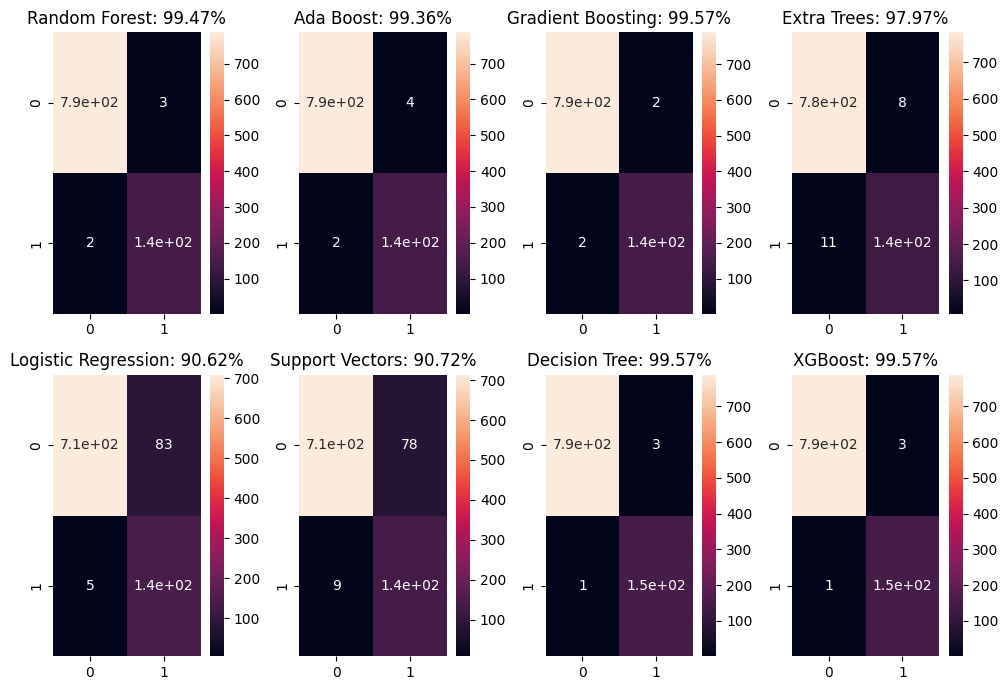

In [ ]:
scores = []
reports = dict()
index = 0
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
for i in range(2):
    for j in range(4):
        score, report = training(models[index], names[index], axes[i][j])
        scores += [score]
        reports[names[index]] = report
        index += 1
plt.tight_layout()
plt.show()

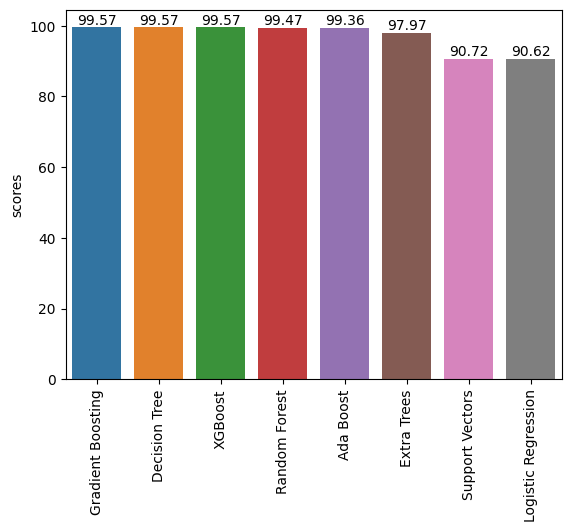

In [ ]:
dt = pd.DataFrame({"scores": scores}, index=names)
dt = dt.sort_values("scores", ascending=False)
dt["scores"] = round(dt["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dt.index, y=dt.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
for i in dt.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
Gradient Boosting
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938




******************************
Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.98      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938




******************************
XGBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       791
         1.0       0.98      0.99      0.99       147

    accuracy                           1.00